# HRC -I  background event files

In [3]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [4]:
/bin/rm -rf 144/
download_chandra_obsid 144 evt2,asol
/bin/ls 144/primary/*


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       49 Mb  ####################          < 1 s  50042.3 kb/s
  asol     fits        7 Mb  ####################          < 1 s  35640.1 kb/s

      Total download size for ObsId 144 = 55 Mb
      Total download time for ObsId 144 = 1 s

144/primary/hrcf00144N009_evt2.fits.gz
144/primary/pcadf00144_000N001_asol1.fits.gz


## Naming scheme

In [5]:
ls -1 $CALDB/data/chandra/hrc/bkgrnd/

README.txt
hrc_bkgrnd_manifest.txt
hrciD2000-01-01bkgrndN0002.fits
hrciD2001-01-01bkgrndN0002.fits
hrciD2002-01-01bkgrndN0002.fits
hrciD2003-01-01bkgrndN0002.fits
hrciD2004-01-01bkgrndN0002.fits
hrciD2005-01-01bkgrndN0002.fits
hrciD2006-01-01bkgrndN0002.fits
hrciD2007-01-01bkgrndN0002.fits
hrciD2008-01-01bkgrndN0002.fits
hrciD2009-01-01bkgrndN0002.fits
hrciD2010-01-01bkgrndN0002.fits
hrciD2011-01-01bkgrndN0002.fits
hrciD2012-01-01bkgrndN0002.fits
hrciD2013-01-01bkgrndN0002.fits
hrciD2014-01-01bkgrndN0002.fits
hrciD2015-01-01bkgrndN0003.fits
hrciD2016-01-01bkgrndN0001.fits
hrciD2017-01-01bkgrndN0001.fits


## Using lookup

In [6]:
hrc_bkgrnd_lookup 144/primary/hrcf00144N009_evt2.fits event

/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/hrc/bkgrnd/hrciD2000-01-01bkgrndN0002.fits


In [7]:
dmkeypar 144/primary/hrcf00144N009_evt2.fits DATE-OBS echo+

2000-09-01T00:13:35


In [8]:
pget hrc_bkgrnd_lookup outfile

/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/hrc/bkgrnd/hrciD2000-01-01bkgrndN0002.fits


## Make local copy

In [9]:
cp -fv \
    $CALDB/data/chandra/hrc/bkgrnd/hrciD2000-01-01bkgrndN0002.fits \
    144_bg.fits


'/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/hrc/bkgrnd/hrciD2000-01-01bkgrndN0002.fits' -> '144_bg.fits'


In [10]:
chmod +w 144_bg.fits

## Tailor files


### Add `PNT` keywords

In [11]:
dmlist 144_bg.fits header |grep PNT

0071 RA_PNT                                  0           Real8        Pointing RA
0072 DEC_PNT                                 0           Real8        Pointing Dec
0073 ROLL_PNT                                0           Real8        Pointing Roll


In [12]:
dmmakepar 144/primary/hrcf00144N009_evt2.fits event_header.par cl+

In [13]:
grep _pnt event_header.par | tee event_pnt.par

ra_pnt,r,h,278.38637016348,,,"Pointing RA [deg]"
dec_pnt,r,h,-10.571749063739,,,"Pointing Dec [deg]"
roll_pnt,r,h,266.24919057005,,,"Pointing Roll [deg]"


In [14]:
dmreadpar event_pnt.par "144_bg.fits[events]" clobber+

In [15]:
dmlist 144_bg.fits header |grep PNT

0071 RA_PNT                     278.3863701635           Real8        Pointing RA [deg]
0072 DEC_PNT                    -10.5717490637           Real8        Pointing Dec [deg]
0073 ROLL_PNT                   266.2491905701           Real8        Pointing Roll [deg]


### Apply status filter

In [16]:
dmhistory 144/primary/hrcf00144N009_evt2.fits dmcopy

# dmhistory (CIAO 4.14): WARNING: Found and corrected "pixlib" library parameters

dmcopy infile="/dsops/repro5/sdp.2/opus/prs_run/tmp//HRC_L2____746627376n294/output/tmpf00144N009_evt2.fits[status=xxxxxx00xxxx0xxx00000000x0000000]" outfile="/dsops/repro5/sdp.2/opus/prs_run/tmp//HRC_L2____746627376n294/output/hrcf00144N009_evt2.fits" kernel="default" option="" verbose="0" clobber="no" 



In [17]:
dmcopy "144_bg.fits[status=xxxxxx00xxxx0xxx00000000x0000000]" \
       144_filt_bg.fits clob+

### Reproject 

In [18]:
pset reproject_events infile=144_filt_bg.fits
pset reproject_events outfile=144_reproj_bg.fits
pset reproject_events aspect=144/primary/pcadf00144_000N001_asol1.fits
pset reproject_events match=144/primary/hrcf00144N009_evt2.fits
pset reproject_events random=0
reproject_events mode=h clo+

[1] 30911
[1]+  Done                    ds9 144/primary/hrcf00144N009_evt2.fits.gz -scale log -bin factor 32 144_reproj_bg.fits -scale linear -bin factor 32 -saveimage png ds9.png


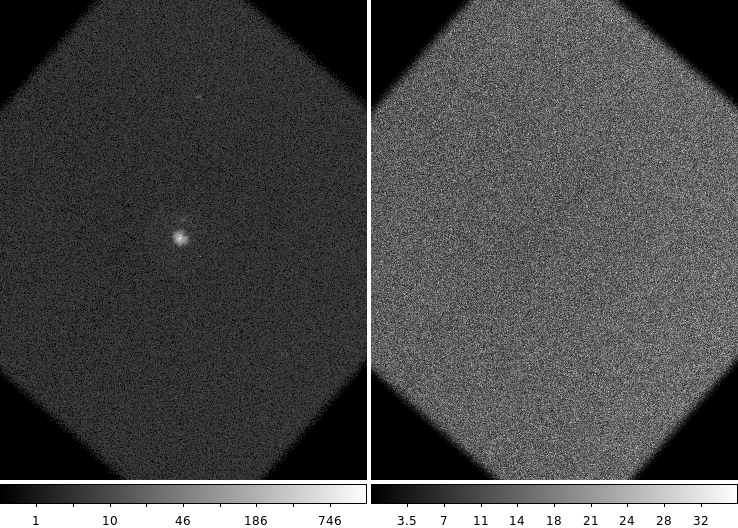

In [19]:
ds9 144/primary/hrcf00144N009_evt2.fits.gz -scale log -bin factor 32 \
  144_reproj_bg.fits -scale linear -bin factor 32 \
  -saveimage png ds9.png &
sleep 10
xpaset -p ds9 quit


display < ds9.png

# Cleanup


In [20]:
/bin/rm -rf 144
